##  Bank Marketing Campaign dataset
####  Introduction

This is dataset that describe Portugal bank marketing campaigns results.The conducted campaigns were based mostly on direct phone calls, offering the bank's clients to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

Term Deposits are one of the best investment options for people who are looking for a stable and safe return on their investments. For term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period.

##  Details of the Dataset
Sources:https://archive.ics.uci.edu/ml/datasets/bank+marketing

Citation Request :[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

##  Problem Statement
To develop a model that will be used to predict if a client can subscribe to the term deposit or not.



##  Import Libraries

In [1]:
## Standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data pre-processing modules
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split

## classification algorithimns to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest, f_classif

## hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
## To import dataset
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
## To check missing values, data types, shape
df.isnull().sum(), df.dtypes, df.shape

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 deposit      0
 dtype: int64,
 age           int64
 job          object
 marital      object
 education    object
 default      object
 balance       int64
 housing      object
 loan         object
 contact      object
 day           int64
 month        object
 duration      int64
 campaign      int64
 pdays         int64
 previous      int64
 poutcome     object
 deposit      object
 dtype: object,
 (11162, 17))

## 
1. No missing valuess,
2. We have 11,162 rows with 17 attributes

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


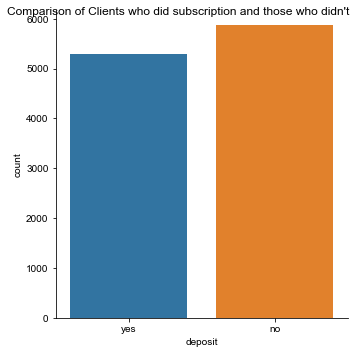

In [6]:
### To check if the target is balanced

y_data=sns.catplot(data=df,x="deposit",kind="count")
y_data.fig.suptitle("Comparison of Clients who did subscription and those who didn't")
sns.set_style("darkgrid")

##   Insights from above
  1. Our dataframe is balanced
  

### Categorical analysis

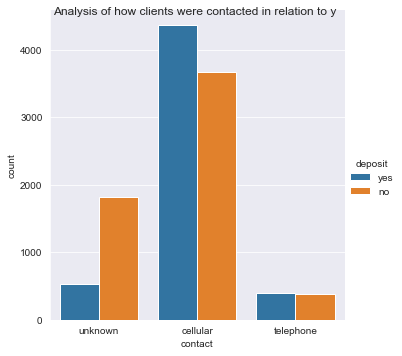

In [6]:

contact_y=sns.catplot(x="contact",hue="deposit",data=df,kind="count")
contact_y.fig.suptitle("Analysis of how clients were contacted in relation to y")
sns.set_style("darkgrid")

###  Insight
1. There were two known channels for contacting clients; cellular and telephone while there was the unknown channel
2. 2.Clients who subscribed more to the term deposit are those who were contacted via cellular, then followed by uknwown then via telephone
3. Clients who subscribed and did not subscribe to the term deposit via telephone  contact channel are the same in number

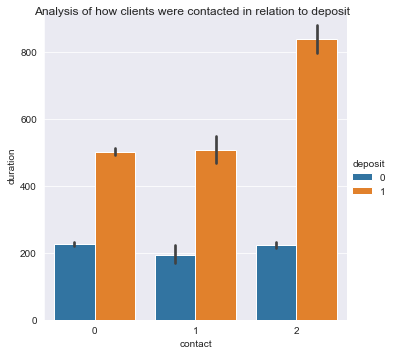

In [44]:
contact_y=sns.catplot(x="contact",y="duration",hue="deposit",data=df,kind="bar")
contact_y.fig.suptitle("Analysis of how clients were contacted in relation to deposit")
sns.set_style("darkgrid")

deposit     no   yes
marital             
divorced   671   622
married   3596  2755
single    1606  1912


<AxesSubplot:xlabel='marital'>

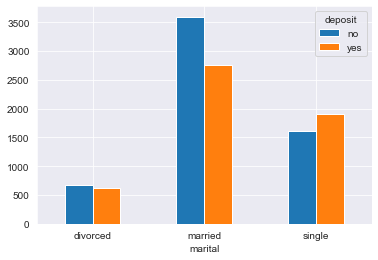

In [8]:
crosstb = pd.crosstab(df.marital, df.deposit)
print(crosstb)
crosstb.plot.bar(rot=0)


### Observation
1.Married people subscribed more to the term deposit than the divorced people. 


deposit    no   yes
housing            
no       2527  3354
yes      3346  1935


<AxesSubplot:xlabel='housing'>

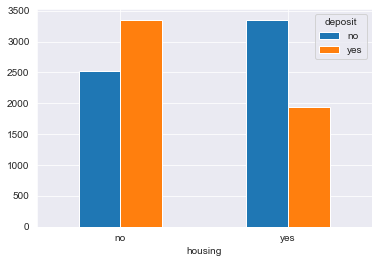

In [9]:
crosstbb = pd.crosstab(df.housing, df.deposit)

print(crosstbb)

crosstbb.plot.bar(rot=0)

deposit    no  yes
month             
apr       346  577
aug       831  688
dec        10  100
feb       335  441
jan       202  142
jul       887  627
jun       676  546
mar        28  248
may      1899  925
nov       540  403
oct        69  323
sep        50  269


<AxesSubplot:xlabel='month'>

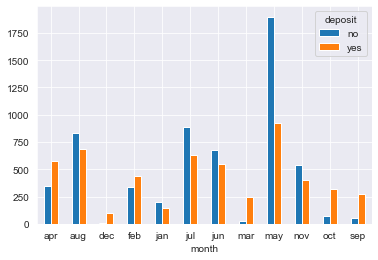

In [10]:
crosstbm = pd.crosstab(df.month, df.deposit)

print(crosstbm)

crosstbm.plot.bar(rot=0)

#### There is a clear relation between month and deposit
####  Highest subscription was in the months of May,Aug, July and June

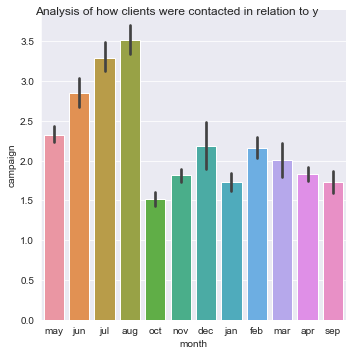

In [11]:
contact_y=sns.catplot(x="month",y="campaign",data=df,kind="bar")
contact_y.fig.suptitle("Analysis of how clients were contacted in relation to y")
sns.set_style("darkgrid")

#### Highest  campaigns were done in the month of August,july, june and may.
####  Least campaigns were done in October
#### In the months where there was a highest campaign, it had a direct impact on subscripition to the term deposit 

## Numerical Analysis

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

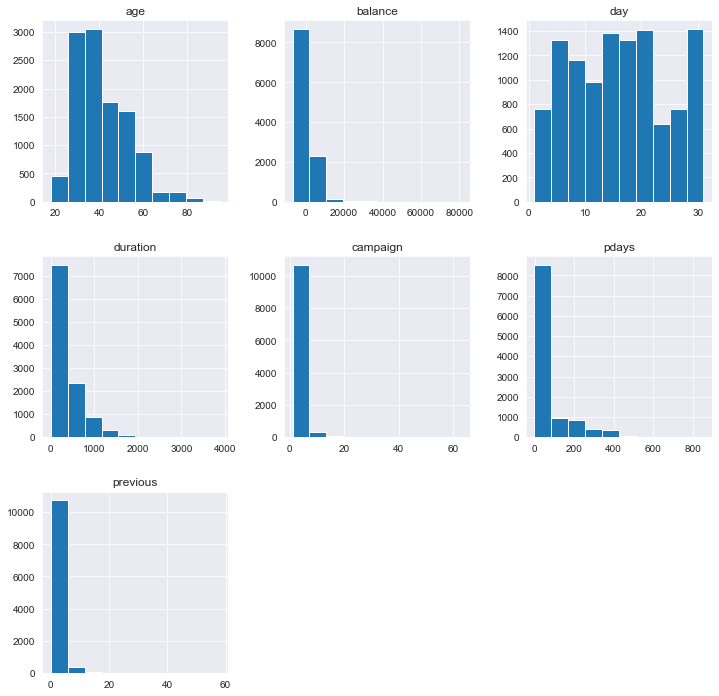

In [12]:
#### To see the distribution of numerical data
df.hist(figsize=(12,12))

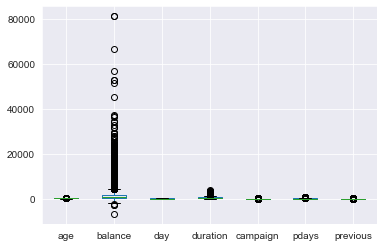

In [13]:
## ##  To check out on outliers
df.boxplot( grid = True)
figsize=(14,14)    

#### We have outliers in balance,age, duration pdys and previous. Balance having the greatest outliers

<AxesSubplot:xlabel='age'>

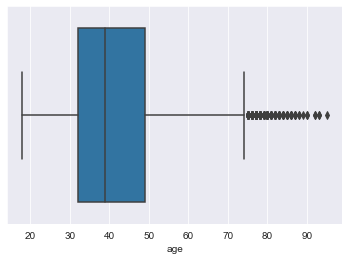

In [14]:
sns.boxplot(df["age"])

<AxesSubplot:xlabel='balance', ylabel='age'>

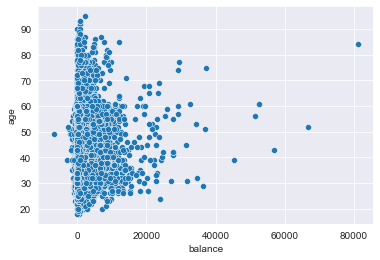

In [15]:
sns.scatterplot(x="balance",y="age",data=df)

## OBSERVATION
#### Client with highest balance is old age
#### looking at the above distribution of balance vs age.balance between 0- 40,000 is highly scattered. 
#### Values above 40,000 and less 0 will be treated as outliers
####  In age, above 80 years, they are less scatttered and therefore we treat them as outliers.

## Data Preprocessing

## 1.Categorical Encoding

In [17]:
##  to convert objects into category dtype

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
deposit      category
dtype: object

In [18]:
l=['loan',"deposit","housing","default"]
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].values)

In [19]:
li=["month","poutcome","contact"]
for i in li:
    oh=OneHotEncoder()
    df[i]=le.fit_transform(df[i].values)

In [20]:
df=pd.get_dummies(df,columns=["job","marital","education"])

In [21]:
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,2,5,8,1042,1,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,2,5,8,1467,1,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,2,5,8,1389,1,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,2,5,8,579,1,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,2,5,8,673,2,...,0,0,0,0,1,0,0,0,1,0


In [22]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')

#### dropping of redundant features
1.Day. It is just stated day with no year. there is relationship with the target feature

2.pdays the number of days that passed by after the client was last contacted from a previous campaign has no relationship with the target column

In [23]:
df2=df.drop(['day',"pdays"], axis=1)
print(df2.shape)

df2.head()

(11162, 31)


,age,default,balance,housing,loan,contact,month,duration,campaign,previous,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,2,8,1042,1,0,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,2,8,1467,1,0,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,2,8,1389,1,0,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,2,8,579,1,0,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,2,8,673,2,0,...,0,0,0,0,1,0,0,0,1,0


## To check out on outliers


<AxesSubplot:>

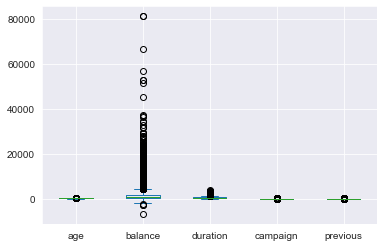

In [24]:
df2[["age","balance","duration","campaign","previous"]].plot(kind="box")

## Observation
We have outliers in the following features that should be handled;
    . Age
    . Balance
    . Duration
    . campaign


In [25]:

df2.drop(df2[(df2["balance"]>40000)|(df2["balance"]<0)].index,inplace=True,axis=0)

In [26]:
df2.drop(df2[(df2["age"]>80)|(df2["age"]<0)].index,inplace=True,axis=0)

In [27]:
df2.drop(df2[df2["duration"]>3000].index,inplace=True,axis=0)

In [28]:
df2.drop(df2[df2["campaign"]>30].index,inplace=True,axis=0)

## Feature scaling

In [29]:
sc = StandardScaler()
df2["balance"] = sc.fit_transform(df2[["balance"]])
df2["age"] = sc.fit_transform(df2[["age"]])
df2["duration"] = sc.fit_transform(df2[["duration"]])
df2["campaign"] = sc.fit_transform(df2[["campaign"]])

In [30]:
## to check if the continuous columns have been scaled. it should be scaled to a mean of 0, and std deviation of 1
## e.g balance
print('Mean:', df2["balance"].mean())
print('Standard Deviation:', df2["balance"].std())


Mean: 1.9580743355181109e-16
Standard Deviation: 1.0000480757674428


In [31]:
df2.head()

,age,default,balance,housing,loan,contact,month,duration,campaign,previous,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,1.535907,0,0.261310,1,0,2,8,1.984913,-0.588292,0,...,0,0,0,0,1,0,0,1,0,0
1,1.278462,0,-0.550005,0,0,2,8,3.239395,-0.588292,0,...,0,0,0,0,1,0,0,1,0,0
2,-0.008762,0,-0.117516,1,0,2,8,3.009161,-0.588292,0,...,1,0,0,0,1,0,0,1,0,0
3,1.192647,0,0.308266,1,0,2,8,0.618264,-0.588292,0,...,0,0,0,0,1,0,0,1,0,0
4,1.106832,0,-0.500931,0,0,2,8,0.895726,-0.188029,0,...,0,0,0,0,1,0,0,0,1,0


## Spliting dataframe

In [32]:
## To split the dataframe into features(x) and label(y)
X= df2.drop(columns=["deposit"])   #Feature Matrix
y=df2["deposit"] ## label


In [33]:
X.head()

,age,default,balance,housing,loan,contact,month,duration,campaign,previous,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,1.535907,0,0.261310,1,0,2,8,1.984913,-0.588292,0,...,0,0,0,0,1,0,0,1,0,0
1,1.278462,0,-0.550005,0,0,2,8,3.239395,-0.588292,0,...,0,0,0,0,1,0,0,1,0,0
2,-0.008762,0,-0.117516,1,0,2,8,3.009161,-0.588292,0,...,1,0,0,0,1,0,0,1,0,0
3,1.192647,0,0.308266,1,0,2,8,0.618264,-0.588292,0,...,0,0,0,0,1,0,0,1,0,0
4,1.106832,0,-0.500931,0,0,2,8,0.895726,-0.188029,0,...,0,0,0,0,1,0,0,0,1,0


##  Feature selection and Training

In [34]:
## To reduce dimensionality 
from sklearn.decomposition import PCA
pca=PCA()
transfromed_x=pca.fit_transform(X)

## to train test 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train,X_test,y_train,y_test=train_test_split(transfromed_x,y,test_size=0.25,random_state=0)


## Modelling

In [35]:
#### to fit  to various models and test their accuracy
logr = LogisticRegression(random_state = 0)
svm_c = SVC(random_state = 0)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state = 0)
dtc = DecisionTreeClassifier(random_state = 0)
gnb = GaussianNB()
bc = BaggingClassifier(random_state = 0)

models = {'LogisticRegression': logr, 'SVC': svm_c, 'KNeighborsClassifier': knc, 'RandomForestClassifier': rfc, 'DecisionTreeClassifier':dtc, 'GaussianNB': gnb, 'BaggingClassifier': bc}
def model_training_testing(models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_predict_trian = model.predict(X_train)
        y_predict_test = model.predict(X_test)
        print(f'{model_name} Training Accuracy:', accuracy_score(y_train, np.round(y_predict_trian)))
        print(f'{model_name} Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
        print('\n')
model_training_testing(models)

LogisticRegression Training Accuracy: 0.7934615384615384
LogisticRegression Testing Accuracy: 0.7858515955401768


SVC Training Accuracy: 0.8384615384615385
SVC Testing Accuracy: 0.8193002691272587


KNeighborsClassifier Training Accuracy: 0.8514102564102564
KNeighborsClassifier Testing Accuracy: 0.7989234909650135


RandomForestClassifier Training Accuracy: 1.0
RandomForestClassifier Testing Accuracy: 0.8100730488273741


DecisionTreeClassifier Training Accuracy: 1.0
DecisionTreeClassifier Testing Accuracy: 0.740484429065744


GaussianNB Training Accuracy: 0.7324358974358974
GaussianNB Testing Accuracy: 0.7239523260284506


BaggingClassifier Training Accuracy: 0.9882051282051282
BaggingClassifier Testing Accuracy: 0.7950788158400616




##### # Our best  model from the above is  SVC

##  Hyperparameter tuning of our best model

In [36]:
#  Let's do hyperparameter tuning to our model
from sklearn.model_selection import GridSearchCV
svm_c= SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm_c, param_grid, refit = True, verbose = 3)
grid_search = GridSearchCV(svm_c, param_grid)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

SVC(C=1, gamma=0.1)

In [37]:
svc_htuned = SVC(C=1)

In [38]:
svc_htuned .fit(X_train, y_train)

SVC(C=1)

##  Evaluation

In [39]:
def model_evaluation(model, X, y, model_name):
    y_predict = model.predict(X)
    print(f'Model: {model_name} \n \n Classification Report: {classification_report(y, y_predict)}')

    cnf_matrix = confusion_matrix(y, y_predict)
    
    class_names = [0, 1]
    tick_marks = np.arange(len(class_names))
    plt.figure(figsize = (9, 7))

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')

    plt.title(f'{model_name} Confusion Matrix', y = 1.1, fontsize = 22)
    plt.ylabel('Actual Label', fontsize = 15)
    plt.xlabel('Predicted Label', fontsize = 15)

Model: SVC 
 
 Classification Report:               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1384
           1       0.80      0.83      0.81      1217

    accuracy                           0.82      2601
   macro avg       0.82      0.82      0.82      2601
weighted avg       0.82      0.82      0.82      2601



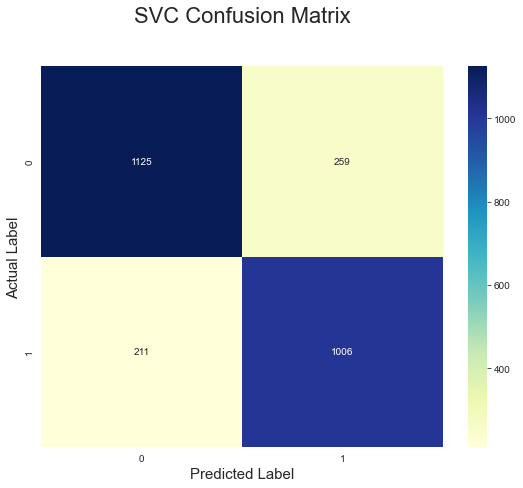

In [40]:
model_evaluation(svc_htuned, X_test, y_test, model_name = 'SVC')

## Saving our model

In [41]:
import pickle
 
pickle.dump(svc_htuned, open('Svm_Model.pkl', 'wb'))

## Feature importance

In [42]:

from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)


ExtraTreesClassifier()

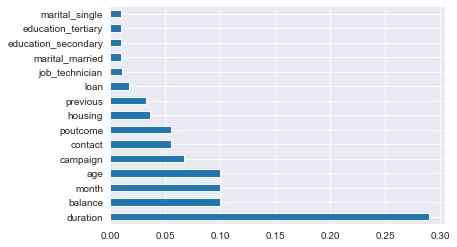

In [43]:
feature_importance=pd.Series(ex.feature_importances_,index=X.columns)
feature_importance.nlargest(15).plot(kind="barh")
plt.show()

####  Recommendation
1.Duration - Clearly, duration plays an important role to whether a customer will subscribe to the term deposit or not.
 When making contact to the clients, they should take a longer duration to explain to the customers in detail aboout the term 
 deposits so as to convience customers to subscribe 
 2.Balance- Clients with a bigger balance should be contacted more 
 3.Age
 4.Month and Campaigns- major campaigns should be done in the months of May, August,July and June
5.Contact - they should make more contact with clients using the cellular channel
6.
